# Назначение - Меры центральности узла

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
from typing import Dict, List

import warnings
warnings.filterwarnings("ignore")

В этом задании мы будем использовать набор данных о станциях Московского метрополитена, взятый из оптимального * Полного исследования маршрута Московского метрополитена. Давайте скачаем и взглянем на данные. https://medium.com/altsoph/moscow-subway-optimal-complete-route-ac98796dd652

In [2]:
station_url = 'https://raw.githubusercontent.com/netspractice/network-science/main/datasets/stations_data.txt'
routes_url = 'https://raw.githubusercontent.com/netspractice/network-science/main/datasets/routes_data.txt'

In [3]:
stations = pd.read_csv(station_url)
routes = pd.read_csv(routes_url)

In [4]:
stations.head()

,id,line_name,station_name,station_type,delay_morning,delay_rush,delay_night,lat,lon
0,0,Sokolnicheskaya,Bulvar Rokossovskogo,deadend,120,90,360,55.814269,37.735117
1,1,Sokolnicheskaya,Cherkizovskaya,pass,120,90,360,55.802991,37.744825
2,2,Sokolnicheskaya,Preobrazhenskaya ploschad,pass,120,90,360,55.796172,37.715022
3,3,Sokolnicheskaya,Sokolniki,pass,120,90,360,55.789200,37.679706
4,4,Sokolnicheskaya,Krasnoselskaya,pass,120,90,360,55.779853,37.666077


In [5]:
routes.head()

,id_from,id_to,route_type,delay
0,0,1,drive,120
1,1,0,drive,120
2,1,2,drive,240
3,2,1,drive,240
4,2,3,drive,180


# Задание 1. График метро (0 points)

Прежде чем мы начнем анализировать центральность, давайте построим график станций.

Напишите функцию metro_graph, которая принимает наборы данных станций и маршрутов и возвращает график со всеми станциями и маршрутами любого типа. Метки узлов находятся в столбце stations.id . Узлы в G.nodes viewer должны располагаться в порядке возрастания. Все узлы должны иметь атрибуты station_name и line_name.

In [6]:
def metro_graph(stations: pd.DataFrame, routes: pd.DataFrame) -> nx.Graph:
    """
    Постройте график со станциями метро и маршрутами

    :param станции: фрейм данных с описанием подземных станций (узлов), идентификатор столбца используется для идентификатора узла в nx.Graph
    :param routes: список границ для графа вне плана. id_from - это исходный, а id_to - целевые узлы.
    :return: график Москвы на нижнем плане
    iterrows() - Итерация по строкам DataFrame в виде пар (индекс, серия).
    """
    # YOUR CODE HERE
    graph = nx.Graph()
    nodes = []
    for i,row in stations.iterrows():
        nodes.append((row["id"], {"station_name": row["station_name"], "line_name": row["line_name"]}))
    graph.add_nodes_from(nodes)
    for i, row in routes.iterrows():
        graph.add_edge(row["id_from"], row["id_to"], route_type = row["route_type"], delay = row["delay"])
    return graph

In [7]:
'''Проверьте порядок узлов, количество узлов, названия станций и линий'''
G = metro_graph(stations, routes)
assert (np.array(list(G.nodes)) == np.arange(194)).sum() == 194
assert G.number_of_edges() == 228
assert G.nodes[100]['station_name'] == 'Shabolovskaya'
assert G.nodes[100]['line_name'] == 'Kaluzhsko-Rizhskaya'

Давайте нарисуем график с раскладкой spring по умолчанию.

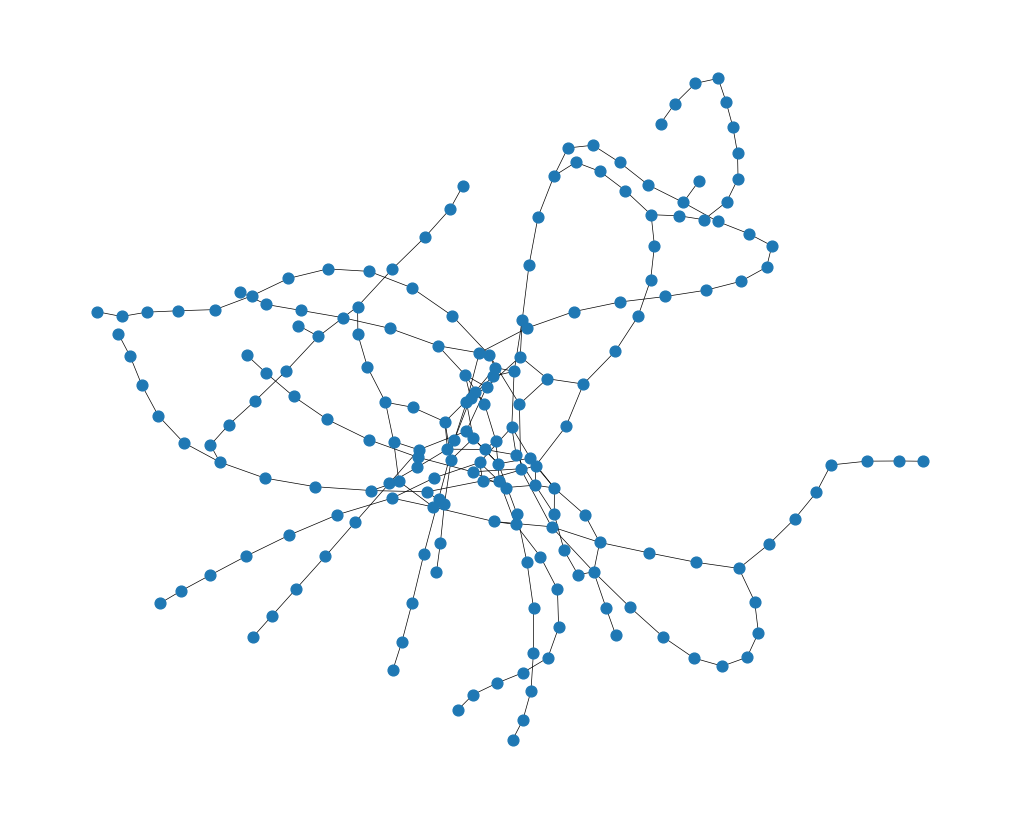

In [8]:
plt.figure(figsize=(10, 8))
nx.draw(G, 
        width=0.5,
        node_size=60)
plt.show()

Пока это не похоже на карту метро. Давайте зададим макет на основе расстояния, используя информацию из набора данных станций.

Напишите функцию metro_layout, которая принимает набор данных станций и возвращает словарь с узлами в качестве ключей и позициями в качестве значений:

{node_id: [долгота, широта]}


In [9]:
def metro_layout(stations: pd.DataFrame) -> Dict[int, List[float]]:
    """
    Постройте макет графика метро на основе расстояния

    :param станции: фрейм данных с описанием подземных станций (узлов), идентификатор столбца используется для идентификатора узла в nx.Graph.
    широта и долгота - это географические координаты станции.
    :return: геопланировка Москвы на нижнем плане
    """
    # YOUR CODE HERE
    layout = dict()
    for i, row in stations.iterrows():
        layout[row["id"]] = [row["lon"], row["lat"]]
    return layout

In [10]:
'''Проверьте тип и положение некоторых случайных узлов'''
pos = metro_layout(stations)
assert type(pos) == dict
assert len(pos) == 194
assert pos[100] == [37.6078018, 55.71882329]
assert pos[172] == [37.72840065, 55.69297728]

Давайте нарисуем график с макетом, основанным на расстоянии.

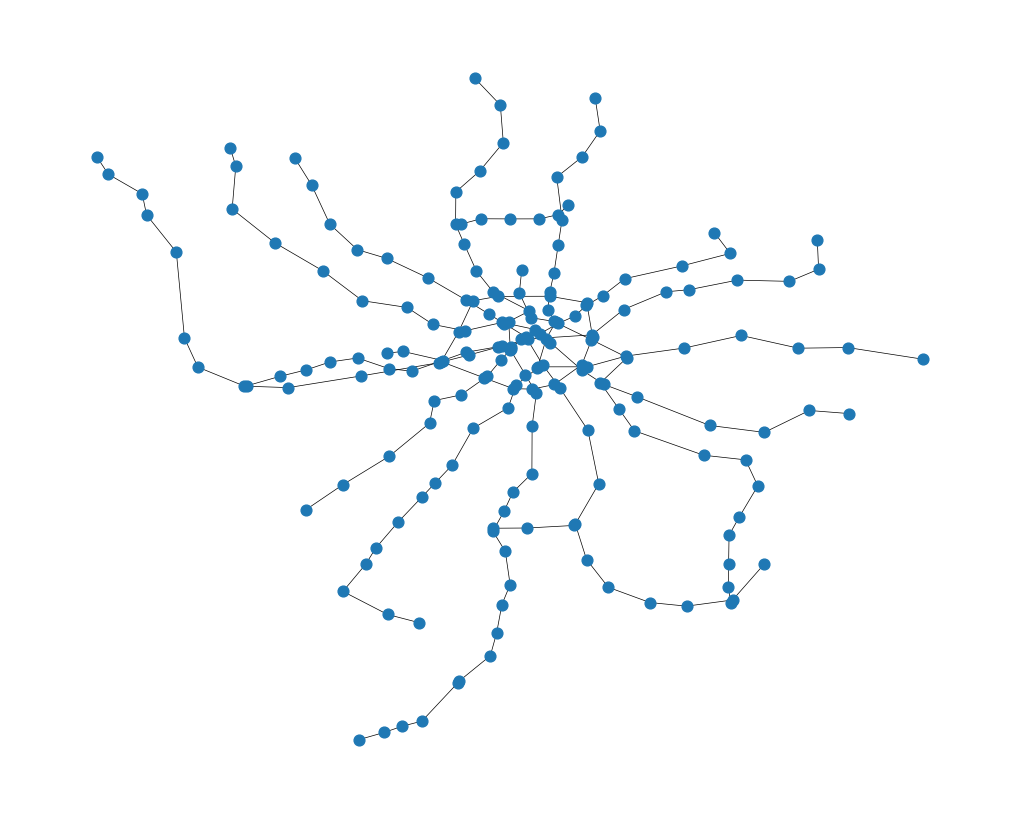

In [11]:
plt.figure(figsize=(10, 8))
nx.draw(G, 
        pos,
        width=0.5,
        node_size=60)
plt.show()

На последнем этапе предварительной обработки давайте раскрасим станции по их линиям.

Напишите функцию station_color, которая принимает график G и возвращает словарь с узлами в качестве ключей и цветом в качестве значений. Цвета указаны в слове line_color

In [12]:
line_color = {
    'Sokolnicheskaya': 'tab:red',
    'Zamoskvoretskaya': 'tab:green',
    'Arbatsko-Pokrovskaya': 'tab:blue',
    'Filevskaya': 'deepskyblue',
    'Koltsevaya': 'tab:brown',
    'Kaluzhsko-Rizhskaya': 'tab:orange',
    'Tagansko-Krasnopresnenskaya': 'tab:purple', 
    'Kalininskaya': 'gold',
    'Serpuhovsko-Timiryazevskaya': 'gray', 
    'Lyublinsko-Dmitrovskaya': 'yellowgreen',
    'Kahovskaya': 'paleturquoise', 
    'Butovskaya': 'lightblue', 
    'Monorels': 'royalblue'
}

In [13]:
def station_color(G: nx.Graph, line_color: Dict[str, str] = line_color) -> Dict[int, str]:
    """
    Определяет цвет станций

    :параметр G: график Москвы под землей
    :параметр line_color: отображение линий нижнего плана на цвета
    :return: сопоставление идентификаторов узлов с их цветами
    """
    # YOUR CODE HERE
    colors = dict()
    for i in range(len(G.nodes)):
        colors[i] = line_color[G.nodes[i]["line_name"]]
    return colors

In [14]:
'''Проверьте тип и цвета некоторых случайных узлов'''
nx.set_node_attributes(G, station_color(G), 'color')
assert type(station_color(G)) == dict
assert len(station_color(G)) == 194
assert station_color(G)[9] == 'tab:red'
assert station_color(G)[193] == 'royalblue'
assert station_color(G)[119] == 'tab:purple'

Давайте нарисуем график с разметкой на основе расстояния и цветами станций.

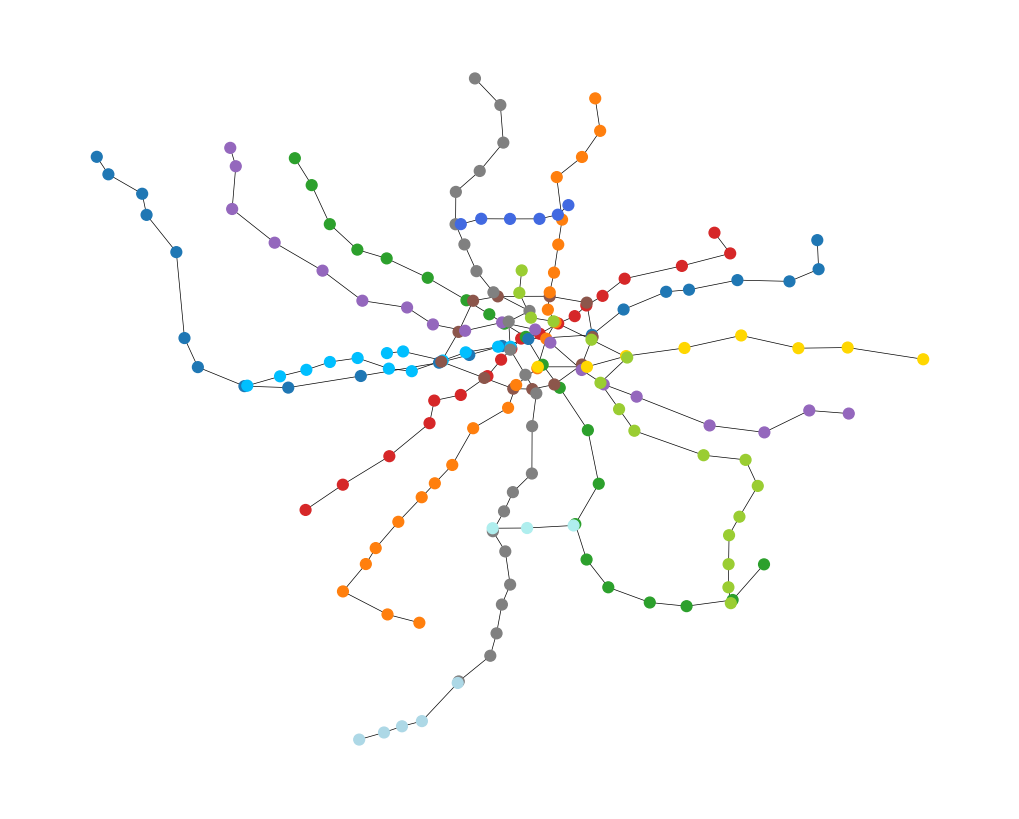

In [15]:
plt.figure(figsize=(10, 8))
nx.draw(
    G, 
    pos,
    width=0.5,
    node_color=list(nx.get_node_attributes(G, 'color').values()),
    node_size=60,
)
plt.show()

# Задание 2. Степень, близость, промежуточность центральности (0 points)

Давайте посмотрим на показатели центральности графика станций метро. Во-первых, используйте networkx для вычисления степени, близости, централизации между ними.

Напишите функцию centralities, которая принимает график G и возвращает словарь с ключами degree, closeness, betweenness. Значения представляют собой np.массивы со значениями каждой центральности.


In [16]:
def centralities(G: nx.Graph) -> Dict[str, np.array]:
    """
    Вычислите степень, близость, промежуточные центральности графика

    :параметр G: график Москвы на нижнем плане
    :return: отображение имен центральности (степень, близость, промежуточность) в np.массив его значений
    """
    # YOUR CODE HERE
    centralites = dict()
    centralites["degree"] = np.array(list(nx.algorithms.centrality.degree_centrality(G).values()))
    centralites["closeness"] = np.array(list(nx.algorithms.centrality.closeness_centrality(G).values()))
    centralites["betweenness"] = np.array(list(nx.algorithms.centrality.betweenness_centrality(G).values()))
    return centralites

In [17]:
'''Проверьте некоторые случайные значения центральностей'''
c = centralities(G)
assert c['degree'].shape[0] == 194
assert c['degree'][193] == 0.0051813471502590676
assert c['closeness'][94] == 0.12107904642409034
assert c['betweenness'][49] == 0.0991400402993669

Далее давайте создадим таблицу с топ-10 узлами для каждой центральности.

Напишите функцию top10_centralities, которая принимает график G и возвращает словарь с ключами degree, closeness, betweenness. Значения представляют собой pd.DataFrames со столбцами:

станция ”линия названия станции” 

центральная линия названия линии” 

значение центральной линии


Каждый фрейм данных содержит 10 строк с наивысшими значениями центральности.


In [18]:
def get_centrality_df(G: nx.Graph, top_10: Dict) -> pd.DataFrame:
    stations = []
    lines = []
    centralites = []
    for i, centrality in top_10:
        stations.append(G.nodes[i]["station_name"])
        lines.append(G.nodes[i]["line_name"])
        centralites.append(centrality)
    return pd.DataFrame(data = {"station": stations, "line": lines, "centrality": centralites})


def top10_centralities(G: nx.Graph) -> Dict[str, pd.DataFrame]:
    """
    Создайте таблицу из 10 лучших узлов по степени, близости, централизации между ними

    :параметр G: график Москвы под землей
    :return: сопоставление названия станции с фреймом данных со столбцами (станция, линия, центральность)
    """
    # YOUR CODE HERE
    top_centralities = dict()
    
    degree_centralites = nx.algorithms.centrality.degree_centrality(G)
    top_10_degree_centralities = sorted(degree_centralites.items(), key=lambda item: item[1], reverse = True)[:10]
    
    closeness_centralities = nx.algorithms.centrality.closeness_centrality(G)
    top_10_closeness_centralities = sorted(closeness_centralities.items(), key=lambda item: item[1], reverse = True)[:10]
    
    betweenness_centralities = nx.algorithms.centrality.betweenness_centrality(G)
    top_10_betweenness_centralities = sorted(betweenness_centralities.items(), key=lambda item: item[1], reverse = True)[:10]
    
    return {
        "degree": get_centrality_df(G, top_10_degree_centralities),
        "closeness": get_centrality_df(G, top_10_closeness_centralities),
        "betweenness": get_centrality_df(G, top_10_betweenness_centralities)
    }

In [19]:
'''Убедитесь, что некоторые случайные узлы находятся в топ-10 таблиц'''
top_dfs = top10_centralities(G)
assert 'Biblioteka imeni Lenina' in top_dfs['degree']['station'].to_list()
assert 'Serpuhovskaya' in top_dfs['betweenness']['station'].to_list()
assert 'Teatralnaya' in top_dfs['closeness']['station'].to_list()
assert 'Arbatsko-Pokrovskaya' in top_dfs['closeness']['line'].to_list()

Следующий код создает визуализацию: для каждой центральности он печатает таблицу и график топ-10, где размер и цвет узла соответствуют значению центральности.

Degree centrality


,station,line,centrality
0,Biblioteka imeni Lenina,Sokolnicheskaya,0.025907
1,Arbatskaya,Arbatsko-Pokrovskaya,0.025907
2,Kievskaya,Filevskaya,0.025907
3,Chistye prudy,Sokolnicheskaya,0.020725
4,Tverskaya,Zamoskvoretskaya,0.020725
5,Teatralnaya,Zamoskvoretskaya,0.020725
6,Novokuznetskaya,Zamoskvoretskaya,0.020725
7,Kurskaya,Arbatsko-Pokrovskaya,0.020725
8,Kievskaya,Arbatsko-Pokrovskaya,0.020725
9,Taganskaya,Koltsevaya,0.020725


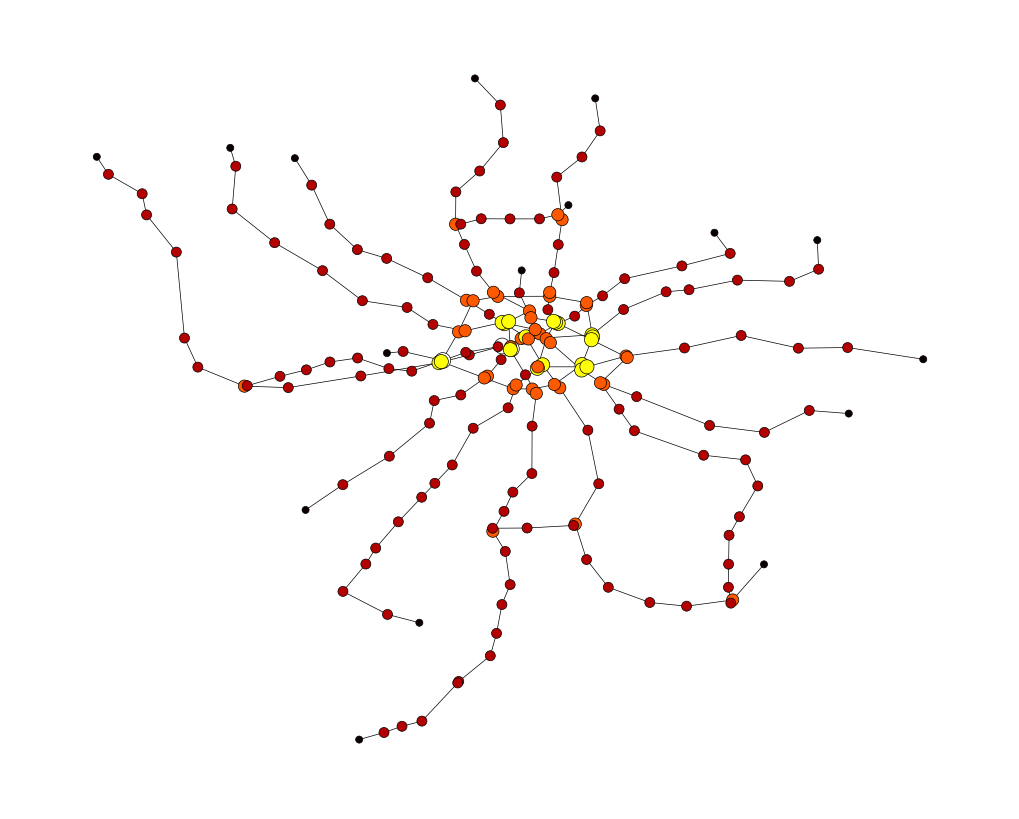

Closeness centrality


,station,line,centrality
0,Teatralnaya,Zamoskvoretskaya,0.141288
1,Ploschad Revolyutsii,Arbatsko-Pokrovskaya,0.141185
2,Novokuznetskaya,Zamoskvoretskaya,0.139350
3,Taganskaya,Koltsevaya,0.138849
4,Kurskaya,Koltsevaya,0.138849
5,Arbatskaya,Arbatsko-Pokrovskaya,0.138451
6,Chehovskaya,Serpuhovsko-Timiryazevskaya,0.137956
7,Paveletskaya,Koltsevaya,0.137857
8,Dobryninskaya,Koltsevaya,0.137464
9,Tretyakovskaya,Kaluzhsko-Rizhskaya,0.137269


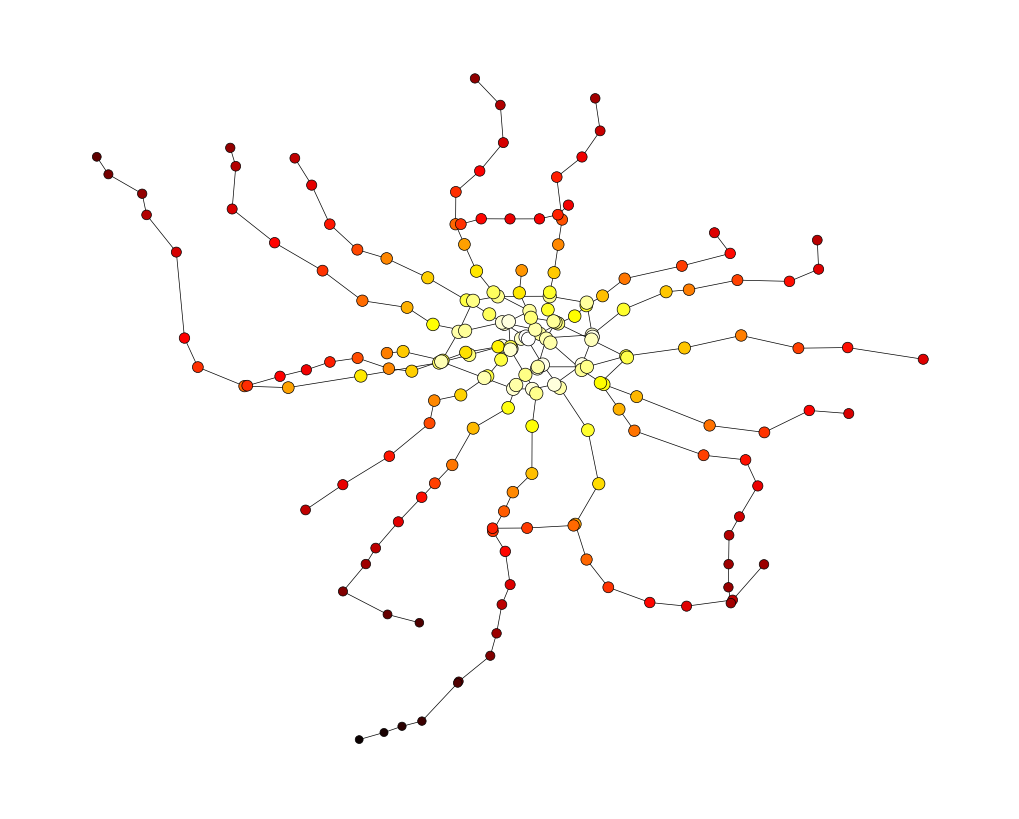

Betweenness centrality


,station,line,centrality
0,Kievskaya,Koltsevaya,0.172276
1,Serpuhovskaya,Serpuhovsko-Timiryazevskaya,0.144095
2,Kievskaya,Arbatsko-Pokrovskaya,0.133394
3,Tulskaya,Serpuhovsko-Timiryazevskaya,0.130192
4,Park kultury,Koltsevaya,0.130139
5,Dobryninskaya,Koltsevaya,0.129763
6,Oktyabrskaya,Koltsevaya,0.124274
7,Oktyabrskaya,Kaluzhsko-Rizhskaya,0.122584
8,Nagatinskaya,Serpuhovsko-Timiryazevskaya,0.122204
9,Krasnopresnenskaya,Koltsevaya,0.122121


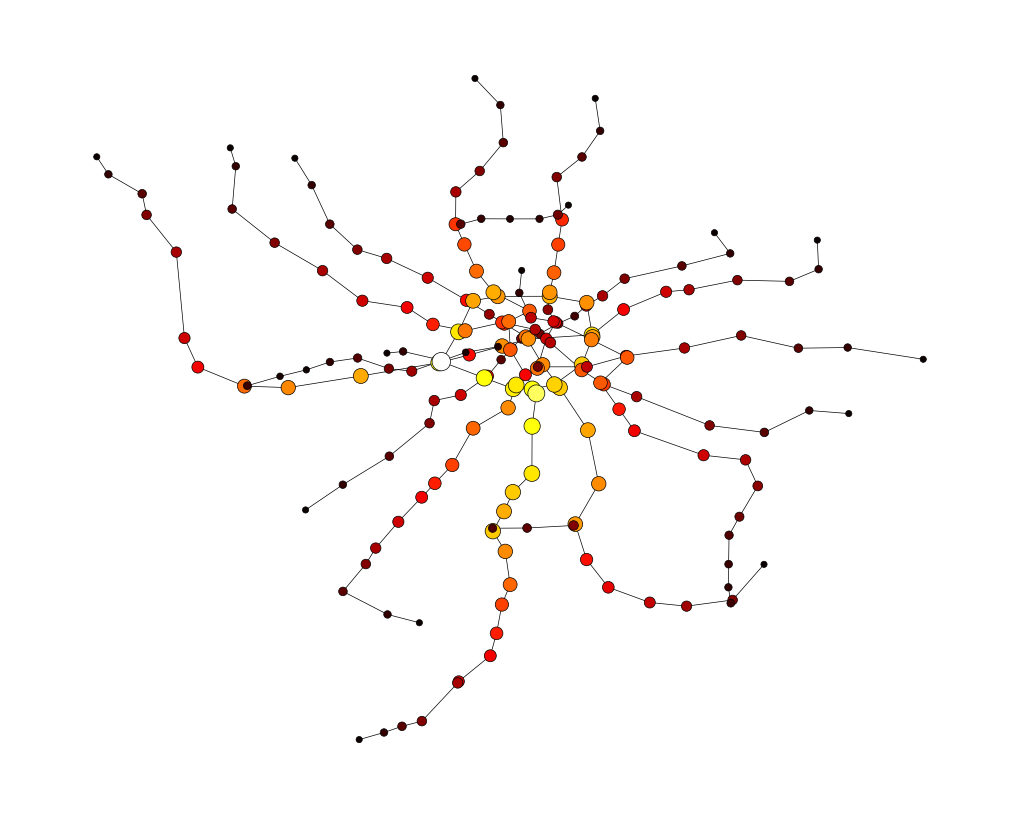

In [20]:
cases = [['degree', 5000, 0, 'Degree centrality'], 
         ['closeness', 700, 0, 'Closeness centrality'], 
         ['betweenness', 900, 20, 'Betweenness centrality']]
for c_key, scale, bias, title in cases:
    print(title)
    display(top_dfs[c_key])
    plt.figure(figsize=(10, 8))
    nx.draw(G, 
            pos,
            width=0.5,
            linewidths=0.5,
            edgecolors='black',
            cmap=plt.cm.hot,
            node_size=c[c_key]*scale + bias,
            node_color=c[c_key])
    plt.show()

# Задача 3. Центр графа (0 points)

В следующем разделе мы немного изменим исходный график - усечем все станции, расположенные за пределами Садового кольца. Садовое кольцо - это область, которая включает в себя все станции Кольцевой линии, все станции радиальных линий, которые пересекают Кольцевую линию, и все станции, которые находятся внутри круга.

Напишите функцию metro_graph_center, которая принимает график метро G и возвращает подграф со станциями внутри Садового кольца.

Подсказка: используйте центральность


In [21]:
def metro_graph_center(G: nx.Graph) -> nx.Graph:
    """
   Постройте подграф со станциями внутри Садового кольца

    :параметр G: график Москвы под землей
    :return: подграф московских подземных станций, расположенных внутри Садового кольца.

    """
    central_nodes = []
    # YOUR CODE HERE
    closeness = nx.closeness_centrality(G)
    central_nodes = set([node for node, value in closeness.items() if value > 0.11])
    subG = G.subgraph(central_nodes).copy()
    extra_nodes = [n for n, d in subG.degree if d == 1]
    extra_nodes.extend([31, 124, 169, 135, 168])
    central_nodes = central_nodes.difference(extra_nodes)
    
    return G.subgraph(central_nodes).copy()

In [22]:
'''Проверьте количество узлов и ребер, а также некоторые случайные станции'''
subG = metro_graph_center(G)
assert len(subG.nodes) == 57
assert len(subG.edges) == 85
assert 149 in list(subG.nodes)
assert 82 in list(subG.nodes)
assert 137 in list(subG.nodes)

Давайте нарисуем центр графика метро с названиями станций и цветами.

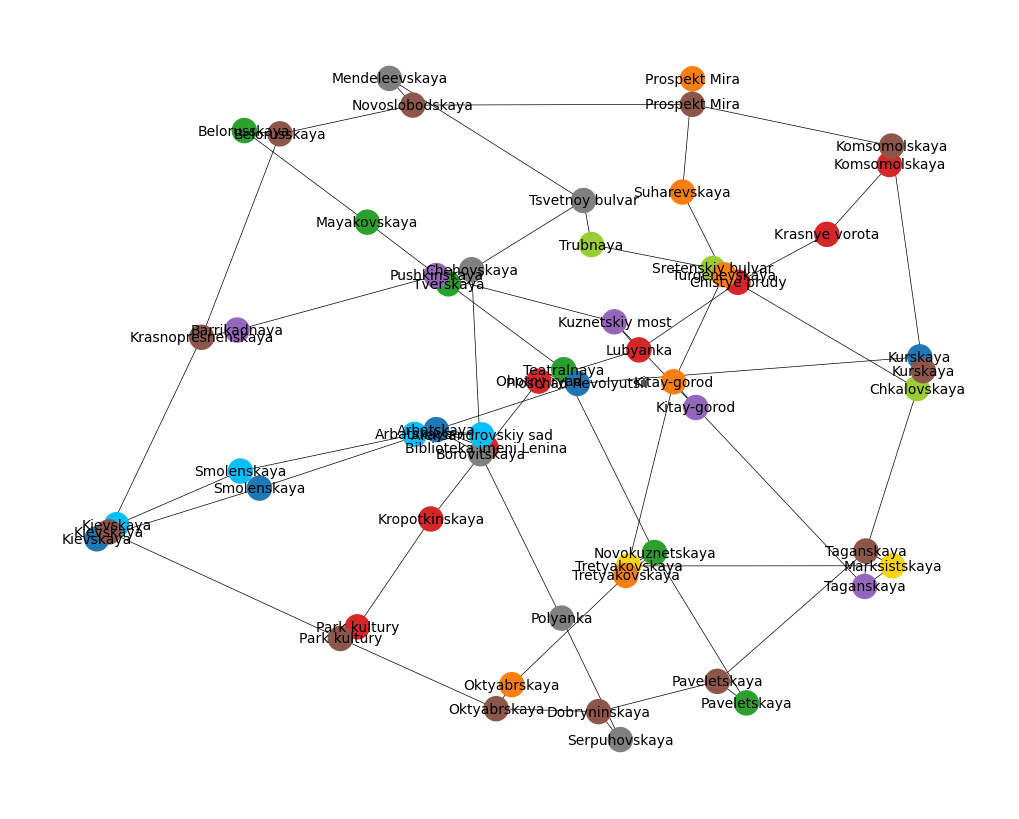

In [23]:
plt.figure(figsize=(10, 8))
nx.draw(subG, 
        pos,
        width=0.5,
        node_color=list(nx.get_node_attributes(subG, 'color').values()),
        labels=nx.get_node_attributes(subG, 'station_name'),
        font_size=10)
plt.show()

# Задание 4. Центральность централизация (3 points)

Центр графика метро немного похож на круговой график. Мы можем видеть, что круговой граф имеет самую низкую централизацию, так как
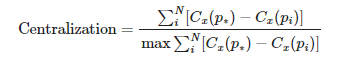

где

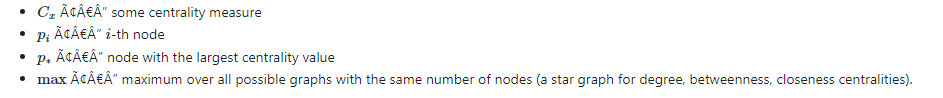 
1.некоторая мера центральности

2.i-th узел

3.узел с наибольшим значением центральности 

4.максимум по всем возможным графам с одинаковым количеством узлов (звездообразный граф для степени, промежуточности, централизации близости).


Давайте проверим, как меняется централизация при преобразовании нашего усеченного графа в чистый круговой граф.

Напишите функцию centralization_seq, которая берет усеченный граф G и удаляет станции, кроме Кольцевой линии, одну за другой в порядке возрастания идентификаторов узлов (т.е. результат отсортированной функции). На каждом шаге после удаления вычисляется централизация. Функция возвращает кортеж:

словарь, где ключами являются степень, близость, промежуточность, а значениями 
- np.массивы со значениями централизации

- список упорядоченных удаленных узлов

In [24]:
def centralization_seq(G: nx.Graph) -> (Dict[str, np.array], List[str]):
    # YOUR CODE HERE
    G1 = G.copy()
    removed_nodes = []
    centrality_dict = {'degree': np.array([]),
                       'closeness': np.array([]),
                       'betweenness': np.array([])}
       
    for node in sorted(G1.nodes):
        if nx.get_node_attributes(G1, 'line_name')[node] != 'Koltsevaya':
            G1.remove_node(node)
            removed_nodes.append(node)
            cases = [['degree', nx.degree_centrality(G1)], 
                     ['closeness', nx.closeness_centrality(G1)], 
                     ['betweenness', nx.betweenness_centrality(G1)]]
            n_nodes = len(G1.nodes)
            perfect_centrality_graph = nx.generators.classic.star_graph(n_nodes - 1)
            
            for title, centrality in cases:
                actual_max_centrality = max([d for k, d in centrality.items()])
                
                if title == 'degree':
                    ideal_max_centrality_dict = nx.degree_centrality(perfect_centrality_graph)
                    ideal_max_centrality = max([d for k, d in ideal_max_centrality_dict.items()])
                    numerator = np.sum(np.full(n_nodes, 
                                               actual_max_centrality) - [cases[0][1][i] for i in G1.nodes])
                    denominator = np.sum(np.full(len(ideal_max_centrality_dict), 
                                                 ideal_max_centrality) - [d for k, 
                                                                          d in ideal_max_centrality_dict.items()])

                elif title == 'closeness':
                    ideal_max_centrality_dict = nx.closeness_centrality(perfect_centrality_graph)
                    ideal_max_centrality = max([d for k, d in ideal_max_centrality_dict.items()])
                    numerator = np.sum(np.full(n_nodes, 
                                               actual_max_centrality) - [cases[1][1][i] for i in G1.nodes])
                    denominator = np.sum(np.full(len(ideal_max_centrality_dict), 
                                                 ideal_max_centrality) - [d for k, 
                                                                          d in ideal_max_centrality_dict.items()])
                
                elif title == 'betweenness':
                    ideal_max_centrality_dict = nx.betweenness_centrality(perfect_centrality_graph)
                    ideal_max_centrality = max([d for k, d in ideal_max_centrality_dict.items()])
                    numerator = np.sum(np.full(n_nodes, 
                                               actual_max_centrality) - [cases[-1][1][i] for i in G1.nodes])
                    denominator = np.sum(np.full(len(ideal_max_centrality_dict), 
                                                 ideal_max_centrality) - [d for k, 
                                                                          d in ideal_max_centrality_dict.items()])
                
                centrality_dict[title] = np.append(centrality_dict[title], numerator / denominator)
    return centrality_dict, removed_nodes

In [25]:
'''Проверьте форму вывода и некоторые случайные значения централизации'''
cent, order = centralization_seq(subG)
assert len(order) == 45
assert order[0] == 5
assert order[-1] == 167
assert cent['degree'].shape == (45,)
assert cent['closeness'].shape == (45,)
assert cent['betweenness'].shape == (45,)
assert cent['degree'][-1] == cent['betweenness'][-1] == cent['closeness'][-1]
assert cent['degree'][41].round(4) == 0.0824
assert cent['degree'][2].round(4) == 0.0406
assert cent['closeness'][11].round(4) == 0.0785
assert cent['closeness'][9].round(4) == 0.0814
assert cent['betweenness'][14].round(4) == 0.1178

Давайте нарисуем, как меняется централизация, когда граф стремится к круговому графу.

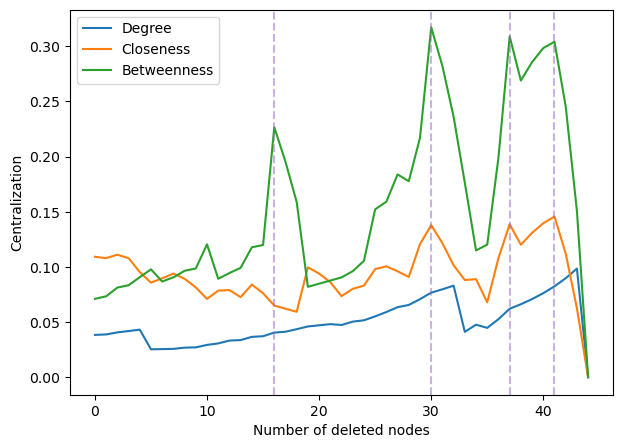

In [26]:
plt.figure(figsize=(7, 5))
plt.plot(cent['degree'], label='Degree')
plt.plot(cent['closeness'], label='Closeness')
plt.plot(cent['betweenness'], label='Betweenness')
plt.ylabel('Centralization')
plt.xlabel('Number of deleted nodes')
plt.axvline(16, linestyle='--', color='C4', alpha=0.5)
plt.axvline(30, linestyle='--', color='C4', alpha=0.5)
plt.axvline(37, linestyle='--', color='C4', alpha=0.5)
plt.axvline(41, linestyle='--', color='C4', alpha=0.5)
plt.legend()
plt.show()

Мы можем видеть значительные пики в централизации промежуточности. Более высокая централизация означает, что показатели централизации неравномерно распределены по узлам. Центральность промежуточности для конкретного узла указывает, сколько кратчайших путей проходит через этот узел. Пики сигнализируют о том, что мы прерываем некоторые кратчайшие пути после удаления узла, поэтому новые кратчайшие пути должны проходить через небольшое количество определенных узлов. Давайте визуализируем график до и после удаления узла под индексом 37 (Цветной бульвар), чтобы понять этот эффект.

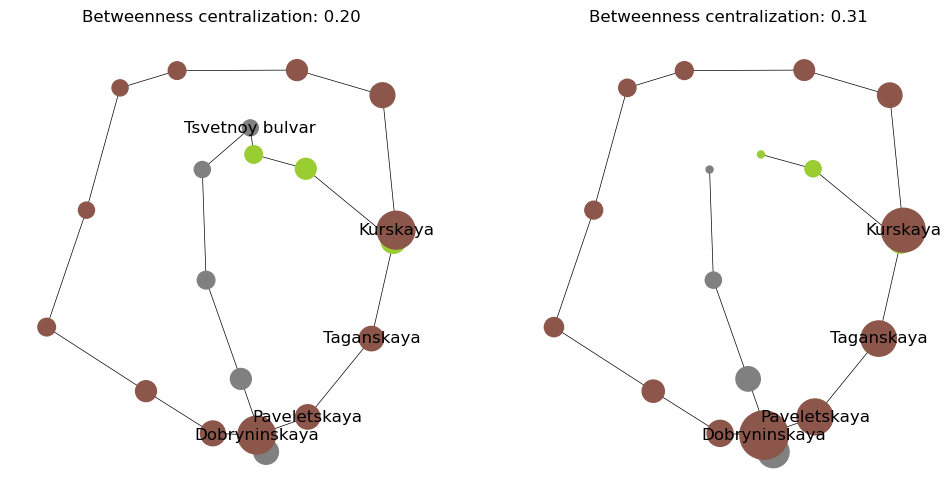

In [27]:
plt.figure(figsize=(12, 6))
cases = [[36, [147, 77, 78, 79, 80]], [37, [77, 78, 79, 80]]]
station_names = nx.get_node_attributes(subG, 'station_name')
for i, (node_id, stations) in enumerate(cases):
    plt.subplot(1, 2, i+1)
    s = subG.copy()
    s.remove_nodes_from(order[:node_id + 1])
    betw = nx.betweenness_centrality(s)
    nx.draw(
        s,
        pos,
        width=0.5,
        node_color=list(nx.get_node_attributes(s, 'color').values()),
        node_size=[(j*60 + 5)**2 for i, j in betw.items()],
        labels={n:v for n, v in station_names.items() if n in stations})
    plt.title('Betweenness centralization: {:.2f}'.format(cent['betweenness'][node_id]))

Цветной бульвар - это узел, предназначенный для удаления на следующем шаге. Размер узла - это центральность между ними. На первом графике мы видим, что существует цикл из серой и светло-зеленой линий, поэтому все узлы на этих линиях могут легко получить доступ друг к другу по кратчайшему пути. Однако после удаления Цветного бульвара цикл нарушается. Таким образом, чтобы соединить станции между серой и светло-зеленой линиями, требуется пройти через пересечение линии с Кольцевой и некоторыми станциями на ней. Это повышает значение центральности между узлами для таких узлов (например, Добрынинская, Павелецкая, Таганская, Курская), сохраняя старые значения для остальной части графика. Это приводит к увеличению общей централизации графа для централизации между ними.
Файл не выбран
Ещё


# Задача 5. Центральная роль Каца (3 points)

Центральность Каца основана на количестве переходов (путь, который может содержать повторяющиеся узлы), проходящих через узел. Кстати, как быстро рассчитать общее количество переходов фиксированной длины между двумя узлами?

Напишите функцию number_of_walks, которая принимает граф G, узлы i, j и длину обхода n. Функция возвращает количество ходов.

In [28]:
def number_of_walks(G: nx.Graph, i: int, j: int, n: int) -> int:
    """
   Вычислить количество путей длиной n

    :параметр G: график московского метрополитена внутри Садового кольца
    :параметр i: начальный узел путей
    :параметр j: целевой узел путей
    :параметр n: размер путей
    :return: количество путей между входными узлами размера n
    """
    # YOUR CODE HERE
    #A = nx.adjacency_matrix(G) #Возвращает матрицу смежности G.
    #Adj = np.array(A.todense()) #Возвратите плотное матричное представление этой матрицы.
    A = nx.adjacency_matrix(G, nodelist=list(G.nodes)).todense() 
    A_power_n = A ** n
    A_dict = {}
    for a in range(0, len(G.nodes)):
        A_dict[list(G.nodes)[a]] = a
    start = A_dict[i]
    end = A_dict[j]
    A_i = np.array(A_power_n[start])
    return A_i[0][end]

In [29]:
'''Проверьте несколько дорожек в центре города'''
# Paveletskaya (Koltsevaya) - Ohotny ryad. Length 4
# Single path: Paveletskaya (Koltsevaya) -> Paveletskaya (Zamoskvoretskaya) 
# -> Novokuznetskaya -> Teatralnaya -> Ohotny ryad
assert number_of_walks(subG, 78, 9, 4) == 1
# Novoslobodskaya - Pushkinskaya. Length 4
# 1st path: Novoslobodskaya -> Belorusskaya -> Krasnopresnenskaya
# -> Barrikadnaya -> Pushkinskaya
# 2nd path: Novoslobodskaya -> Mendeleevskaya -> Tsvetnoy bulvar
# -> Chehovskaya -> Pushkinskaya
assert number_of_walks(subG, 83, 120, 4) == 2
# Novoslobodskaya - Pushkinskaya. Length 7. Many paths.
assert number_of_walks(subG, 83, 120, 7) == 31

Теперь мы можем применить аналогичный подход к вычислению центральности Каца. Формула такова

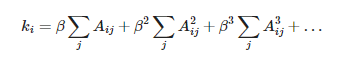
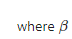 является коэффициентом ослабления с ограничением
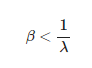 
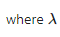 является наибольшим собственным значением матрицы А.

Напишите функцию katz_centrality, которая принимает график G, количество итераций n, коэффициент затухания бета и возвращает np.массив значений центральности.


In [30]:
def katz_centrality(G: nx.Graph, n: int, beta: float) -> np.array:
    """
    Вычислите центральную роль Каца

    :параметр G: график Москвы под землей
    :параметр n: количество итераций в вычислении центральности Каца
    :параметр бета: коэффициент ослабления
    :возврат: массив значений центральности для каждого узла
    np.linalg.matrix_power - Возведите квадратную матрицу в (целую) степень n .
    """
    # YOUR CODE HERE
    lambd = np.max(nx.adjacency_spectrum(G)) #Возвращает собственные значения матрицы смежности G.
    if beta >= 1/lambd:
        raise nx.NetworkXError('error')
    katz_cent = 0
    A = nx.to_numpy_array(G)
    for power in range(1, n+1):
        A_power = np.linalg.matrix_power(A, power).sum(axis=0)
        katz_cent += beta ** power * A_power
    return katz_cent        

In [31]:
'''Проверьте ограничение на бета-версию и реализацию networkx'''
beta = 1 / 3
try:
    katz = katz_centrality(G, 1, beta)
except:
    pass
else:
    raise AssertionError("Did not raise an exception")
beta = 1 / 5
assert 0.9999 < np.corrcoef(katz_centrality(G, 1, beta), c['degree'])[0][1] <= 1
nxkatz = np.array([val for val in nx.katz_centrality(G, beta).values()])
assert 0.9999 < np.corrcoef(katz_centrality(G, 20, beta), nxkatz)[0][1] <= 1

Давайте нарисуем график с помощью визуализации централизации Каца.

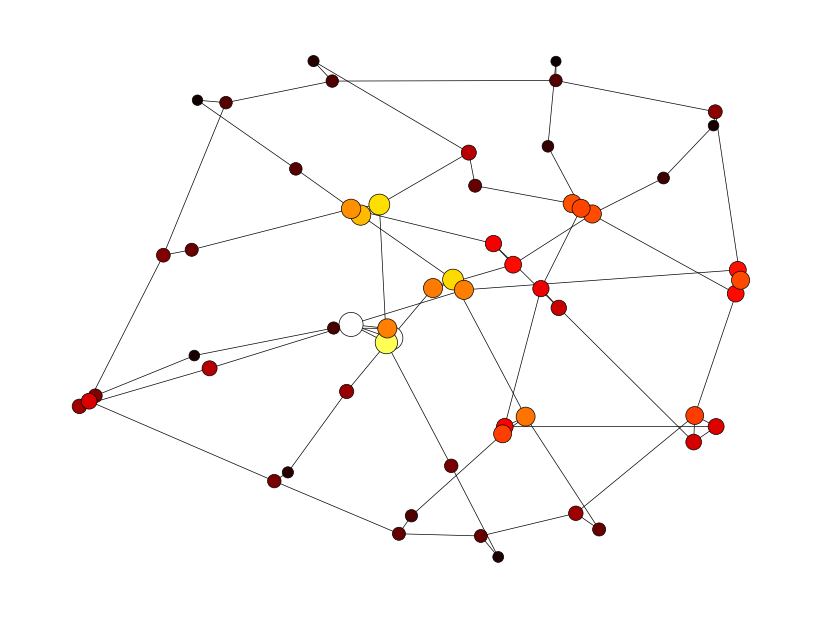

In [32]:
katz_c = katz_centrality(subG, 20, 1/4)
katz_c = katz_c / katz_c.max()
plt.figure(figsize=(8, 6))
nx.draw(subG, 
        pos,
        width=0.5,
        linewidths=0.5,
        edgecolors='black',
        cmap=plt.cm.hot,
        node_size=katz_c*300,
        node_color=katz_c)
plt.show()

Здесь мы можем видеть, как центральность Каца сходится по количеству итераций.

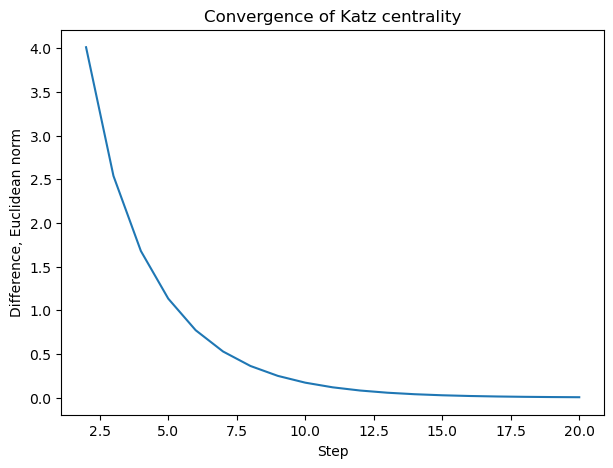

In [33]:
plt.figure(figsize=(7, 5))
convergence = []
old_katz = katz_centrality(G, 1, 0.2)
step_space = np.arange(2, 21)
for i in step_space:
    katz = katz_centrality(G, i, 0.2)
    convergence.append(np.linalg.norm(katz - old_katz))
    old_katz = katz.copy()
plt.plot(step_space, convergence)
plt.ylabel('Difference, Euclidean norm')
plt.xlabel('Step')
plt.title('Convergence of Katz centrality')
plt.show()

# Задача 6. Центральность собственного вектора (3 points)
 

Давайте реализуем центральность собственного вектора, которая может быть интерпретирована как влияние узла. Значение центральности узла учитывает значения центральности его соседей, то есть

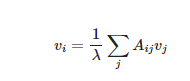
или в матричном виде
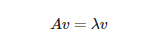
где лямбда - наибольшее собственное значение.

Напишите функцию eigenvector_centrality, которая принимает матрицу смежности A и возвращает np.массив с неотрицательными значениями центральности.

Нормализованная оценка престижа собственного вектора
$$p(v) = \sum_u N^{T}(v, u) \cdot p(u)$$

In [34]:
def eigenvector_centrality(A: np.array) -> np.array:
    """
   Вычислить центральность собственного вектора

    :параметр A: матрица смежности графа
    :return: массив центральностей собственных векторов
    """
    # YOUR CODE HERE
    vector = np.array([1] * A.shape[0])

    for i in range(100):  
        vector = np.dot(A.T, vector) 
        vector = vector / np.linalg.norm(vector) #Normalized eigenvector centrality scoring

    return np.array(vector)

In [35]:
'''Проверьте некоторые случайные значения'''
eig_c = eigenvector_centrality(nx.to_numpy_array(G))
assert np.all(eig_c > 0)
eig_c = eigenvector_centrality(nx.to_numpy_array(subG))
assert np.all(eig_c > 0)
assert eig_c.shape == (57, )
assert eig_c[0].round(4) == 0.0244
assert eig_c[-1].round(4) == 0.0701
assert eig_c[25].round(4) == 0.1198

Давайте нарисуем график с визуализацией централизации собственного вектора.

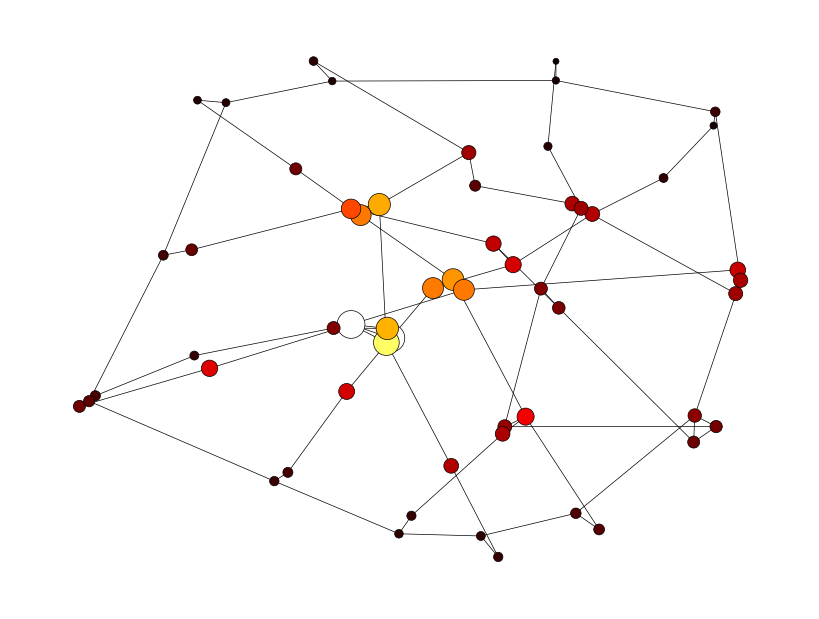

In [36]:
plt.figure(figsize=(8, 6))
nx.draw(subG, 
        pos,
        width=0.5,
        linewidths=0.5,
        edgecolors='black',
        cmap=plt.cm.hot,
        node_size=eig_c/eig_c.max()*400,
        node_color=eig_c)
plt.show()

# Задача 7. Корреляция центральности (1 points)


Наконец, давайте посмотрим на связь между центральностями. Вычислите коэффициент корреляции Пирсона, а затем мы нарисуем точечные диаграммы по парам центральностей.

Напишите функцию pearson_correlation, которая принимает два np.массива и возвращает коэффициент корреляции персон.

In [37]:
def pearson_correlation(i_vals: np.array, j_vals: np.array) -> float:
    """
    Вычислить коэффициент корреляции Пирсона

    :param i_vals: массив центральностей
    :param j_vals: массив центральностей
    :возврат: корреляция Пирсона
    """
    # YOUR CODE HERE
    return np.corrcoef(i_vals, j_vals)[0][1]

In [38]:
'''Проверьте некоторые коэффициенты'''
centvals = [
    ('Degree', list(nx.degree_centrality(G).values())),
    ('Closeness', list(nx.closeness_centrality(G).values())),
    ('Betweenness', list(nx.betweenness_centrality(G).values())),
    ('Katz', katz_centrality(G, 20, 1/5)), 
    ('Eigenvector', eigenvector_centrality(nx.to_numpy_array(G)))
]
assert pearson_correlation(centvals[0][1], centvals[0][1]) == 1
assert round(pearson_correlation(centvals[4][1], centvals[2][1]), 4) == 0.3358
assert round(pearson_correlation(centvals[4][1], centvals[3][1]), 4) == 0.9169
assert round(pearson_correlation(centvals[0][1], centvals[1][1]), 4) == 0.7211
assert round(pearson_correlation(centvals[3][1], centvals[4][1]), 4) == 0.9169

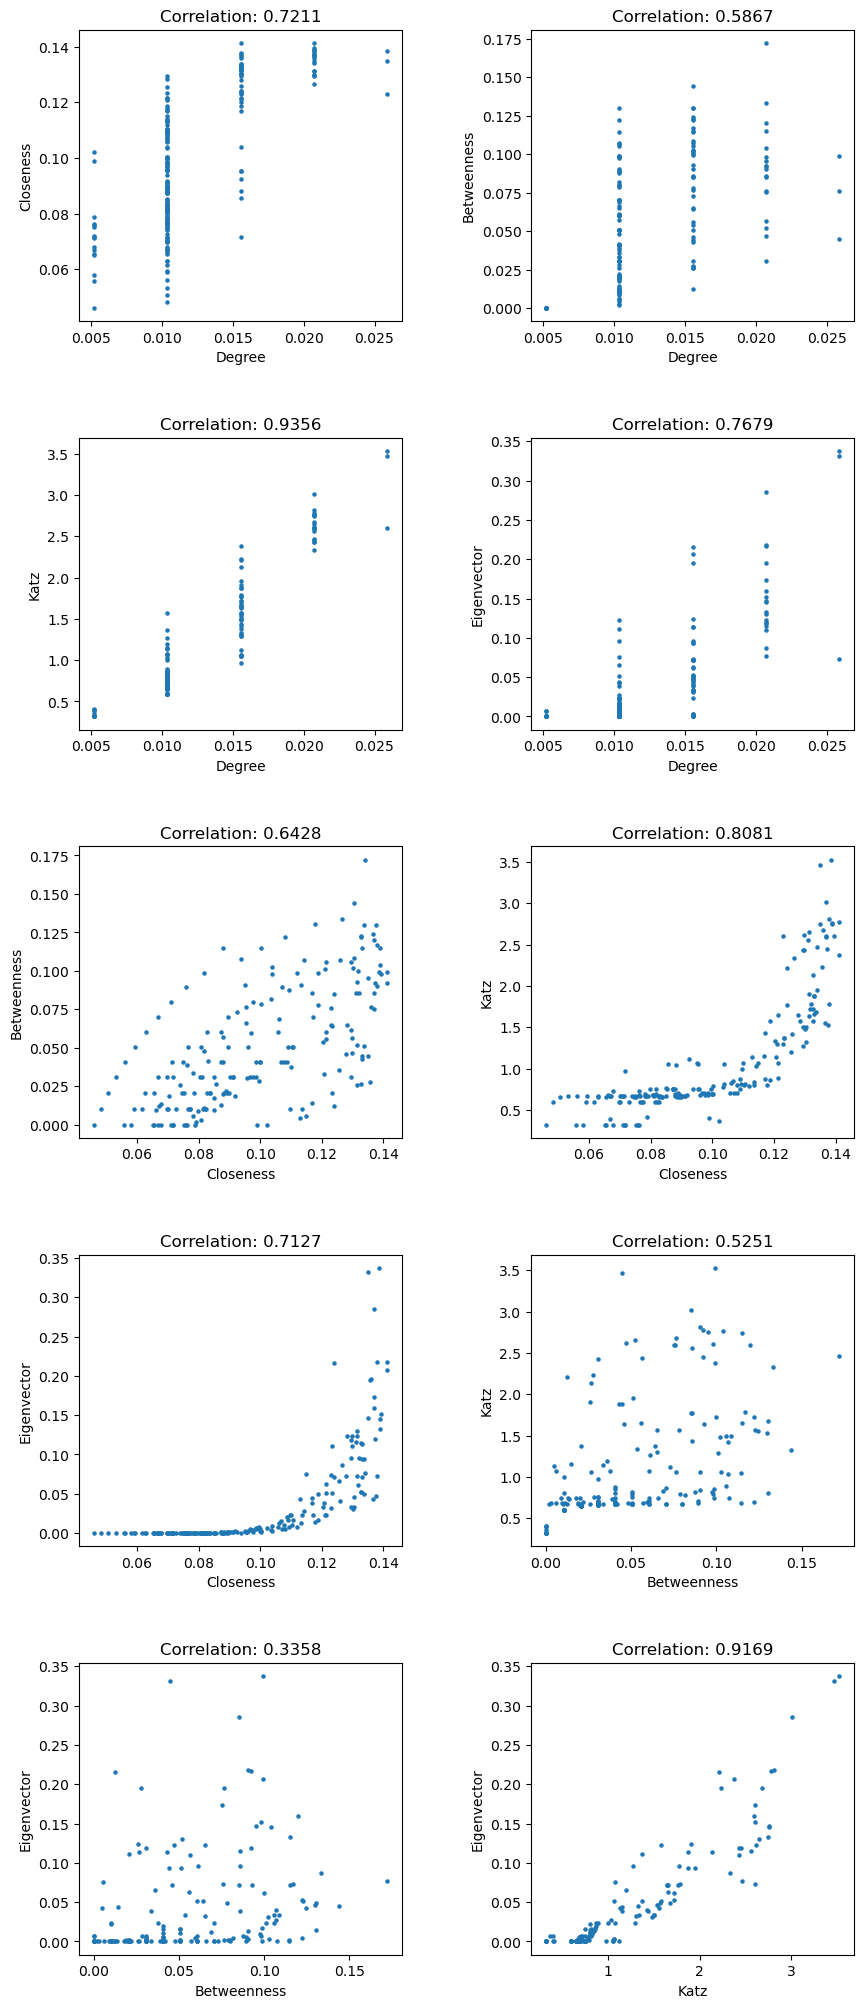

In [39]:
plt.figure(figsize=(2*5, 5*5))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
k = 1
for i in range(len(centvals)):
    for j in range(i + 1, len(centvals)):
        i_label, i_vals = centvals[i]
        j_label, j_vals = centvals[j]
        correlation = pearson_correlation(i_vals, j_vals)
        plt.subplot(5, 2, k)
        plt.scatter(i_vals, j_vals, s=5)
        plt.title('Correlation: {:.4f}'.format(correlation))
        plt.xlabel(i_label)
        plt.ylabel(j_label)
        k += 1